# Homework

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline  
#Эта часть команды указывает, что графики, созданные с помощью Matplotlib, 
#должны отображаться прямо в ячейке Jupyter Notebook, а не в отдельном окне.

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

In [75]:
def beauty_derivative_plot(x):
    px,py = x, 2*np.sin(x) - np.cos(2*x)

    x1 = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y1 = 2*np.sin(x1) - np.cos(2*x1)

    y2 = 2*np.cos(x1) + 2*np.sin(2*x1)
    py2 = 2*np.cos(px) + 2*np.sin(2*px)

    x3 = np.linspace(max(-2*np.pi, px-1), min(2*np.pi, px+1), 2)
    y3 = (2*np.cos(px) + 2*np.sin(2*px))*(x3-px) + 2*np.sin(px) - np.cos(2*px)

    plt.plot(x1,y1,'b-', label ='f(x) = 2sin(x)-cos(2x)')
    plt.plot(x1,y2,'r--', label ="f'(x) = 2cos(x)+2sin(2x)")
    plt.plot(x3,y3,'g-', label =f"Tangent at x = {px}")
    plt.plot([0,px],[py, py], color = 'purple', linestyle='--')
    plt.plot([px,px],[py,0], color = 'purple', linestyle='--')
    plt.scatter(px, py, color='black')
    plt.annotate(f"f'({x})={py2:.2f}", xy = (px,py), xytext=(px-1, py-2),
             arrowprops=dict(arrowstyle='->', connectionstyle = 'arc3, rad=0.1')) #arc3 — стрелка изогн. rad=0.1 — степень изгиба(чем больше, тем сильнее изгиб)
    #plt.legend(prop={'size': 8})
    plt.legend(loc = 'upper right', prop={'size': 6.5}) # Label
    plt.grid(True) # Сетка
    plt.title('Function, Derivative, and Tangent Line')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.axis([-2*np.pi, 2*np.pi, -4, 4])
    plt.show()

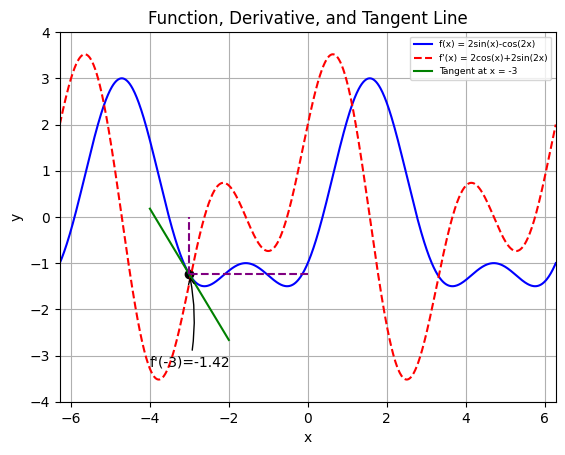

In [76]:
beauty_derivative_plot(-3)

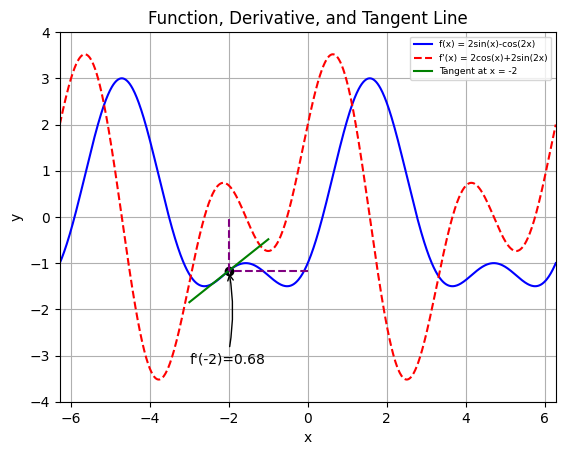

In [77]:
beauty_derivative_plot(-2)

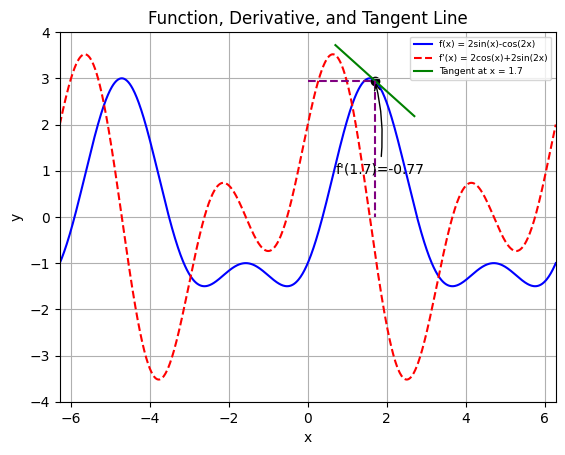

In [78]:
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

In [4]:
data = np.loadtxt("populations.txt", skiprows=1)
data = data.astype(int) # делает всё интом

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

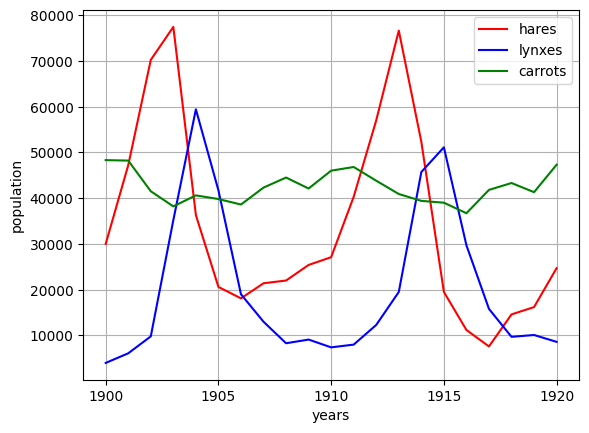

In [5]:
years = data[:, 0] #извлечение 0 столбца
hares = data[:, 1] # 1 столбца и тд
lynxes = data[:, 2]
carrots = data[:, 3]

plt.plot(years, hares, 'r-', label = 'hares')
plt.plot(years, lynxes, 'b-', label = 'lynxes')
plt.plot(years, carrots, 'g-', label = 'carrots')
plt.grid(True)
plt.xticks(np.arange(1900,1921,5)) # массив
plt.yticks(np.arange(10000,90000,10000))
plt.xlabel('years')
plt.ylabel('population')
plt.legend()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

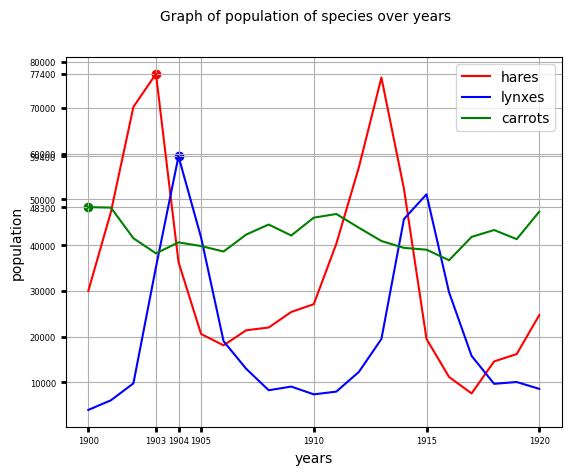

In [6]:
year_max_hares = years[np.argmax(hares)]
year_max_lynxes = years[np.argmax(lynxes)]
year_max_carrots = years[np.argmax(carrots)]

plt.plot(years, hares, 'r-', label = 'hares')
plt.plot(years, lynxes, 'b-', label = 'lynxes')
plt.plot(years, carrots, 'g-', label = 'carrots')

plt.scatter(year_max_hares, np.max(hares), color='red') #точка на графике с координатами(year_max_hares, np.max(hares))
plt.scatter(year_max_lynxes, np.max(lynxes), color='blue')
plt.scatter(year_max_carrots, np.max(carrots), color='green')
plt.grid(True)
plt.xticks(np.union1d(np.union1d(np.union1d(np.arange(1900,1921,5),year_max_lynxes), year_max_carrots),year_max_hares)) #np.union1d - объеденяет массивы
plt.yticks(np.union1d(np.union1d(np.union1d(np.arange(10000,80001, 10000),np.max(hares)), np.max(lynxes)), np.max(carrots)))
plt.xlabel('years')
plt.ylabel('population')
plt.tick_params(axis='both', labelsize=6, width=2) # настройки внешнего вида меток на осях графика (ticks) и их подписей (labels)
plt.legend()
plt.suptitle("Graph of population of species over years", fontsize=10) # немного другой title
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

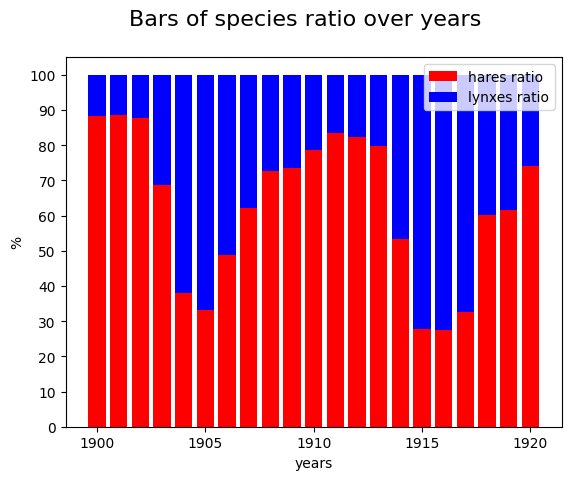

In [7]:
total_population = hares + lynxes
hares_percent = (hares / total_population) * 100
lynxes_percent = (lynxes / total_population) * 100

plt.bar(years, hares_percent, label='hares ratio', color = 'red')  # bar == столбик
plt.bar(years, lynxes_percent, bottom = hares_percent, label='lynxes ratio', color = 'blue')
# в библиотеке Matplotlib параметр upper= не существует для функции plt.bar(). 
# Параметр bottom= используется для указания, от какой высоты начинать отрисовку столбцов
# Поэтому нельзя написать upper = hares_percent

plt.ylabel('%')
plt.xlabel('years')
plt.yticks(np.arange(0,101,10))
plt.legend()
plt.suptitle("Bars of species ratio over years", fontsize=16)
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

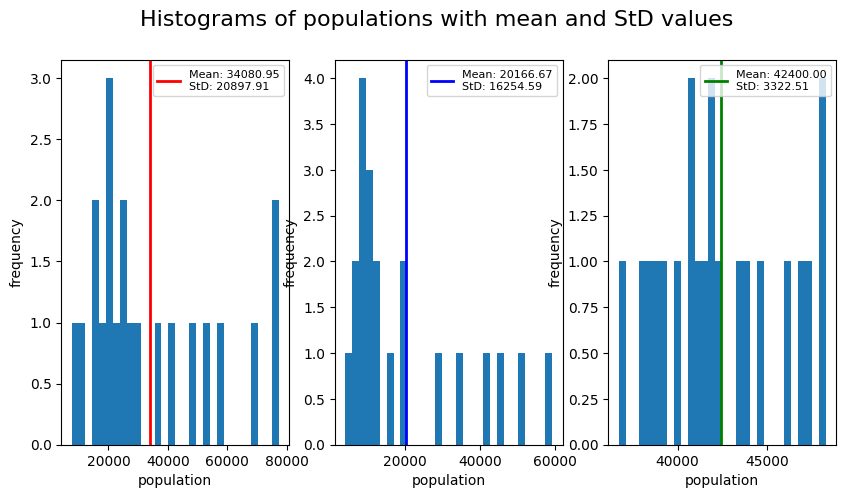

In [ ]:
mean_hares = np.mean(hares) # == Мат ожидание
std_hares = np.std(hares) # ==  sqrt(Дисперсия)
mean_lynxes = np.mean(lynxes)
std_lynxes = np.std(lynxes)
mean_carrots = np.mean(carrots)
std_carrots = np.std(carrots)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(10,5) # устанавливает размер фигуры, (ширина = 10 дюймов) (высота = 5 дюймов)

ax1.hist(hares, bins=30) # cоставление самой гистограммы с помощью массива(по оси 'y' указывается сколько раз в массиве встретились такие значения)
ax1.axvline(mean_hares, color='red', linewidth=2, label=f"Mean: {mean_hares:.2f}\nStD: {std_hares:.2f}") # линия Мат ожидания
ax1.set_xlabel('population')
ax1.set_ylabel('frequency')
ax1.legend(prop={'size': 8})

ax2.hist(lynxes, bins=30)
ax2.axvline(mean_lynxes, color='blue', linewidth=2, label=f"Mean: {mean_lynxes:.2f}\nStD: {std_lynxes:.2f}")
ax2.set_xlabel('population')
ax2.set_ylabel('frequency')
ax2.legend(prop={'size': 8})

ax3.hist(carrots, bins=30)
ax3.axvline(mean_carrots, color='green', linewidth=2, label=f"Mean: {mean_carrots:.2f}\nStD: {std_carrots:.2f}")
ax3.set_xlabel('population')
ax3.set_ylabel('frequency')
ax3.legend(prop={'size': 8})

# ax4.hist(carrots, bins=20)
# ax4.axvline(mean_carrots, color='green', linewidth=2, label=f"Mean: {mean_carrots:.2f}\nStD: {std_carrots:.2f}")
# ax4.set_xlabel('population')
# ax4.set_ylabel('frequency')
# ax4.legend(prop={'size': 8})

plt.suptitle("Histograms of populations with mean and StD values", fontsize=16)
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

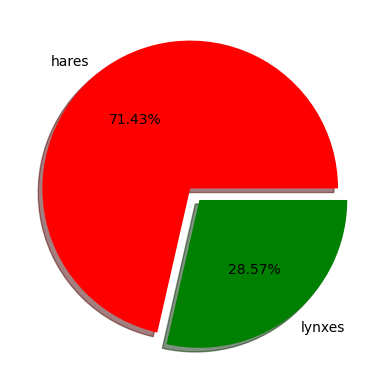

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


In [46]:
arr = np.where(hares > lynxes, 'H', 'L')
result = [np.sum(arr == 'H'), np.sum(arr == 'L')]
colors = ['red', 'green']
labels = ['hares', 'lynxes']

plt.pie(result, colors=colors, labels=labels, explode=(0.05, 0.05), autopct='%.2f%%', shadow=True)
plt.show()
print(arr)

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

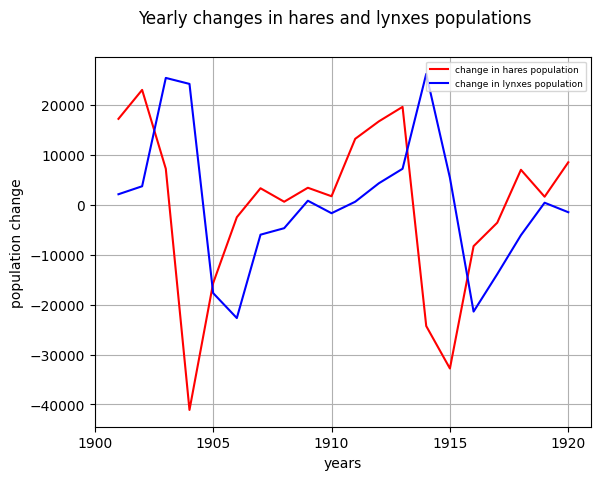

correlation coefficient is  -0.1780136594118296


In [48]:
hares_changes = np.diff(hares) #вычисляет разницу между соседями
lynxes_changes = np.diff(lynxes)
years_diff = years[1:]

plt.plot(years_diff, hares_changes, label="change in hares population", color='red')
plt.plot(years_diff, lynxes_changes, label="change in lynxes population", color='blue')
plt.xlabel("years")
plt.ylabel("population change")
plt.legend(loc='upper right', prop={'size': 6.5})
plt.xticks(np.arange(1900, 1921, 5))
plt.grid(True)
plt.suptitle("Yearly changes in hares and lynxes populations")
plt.show()

correlation_coef = np.corrcoef(hares_changes, lynxes_changes)[0, 1]
print('correlation coefficient is ', correlation_coef)

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

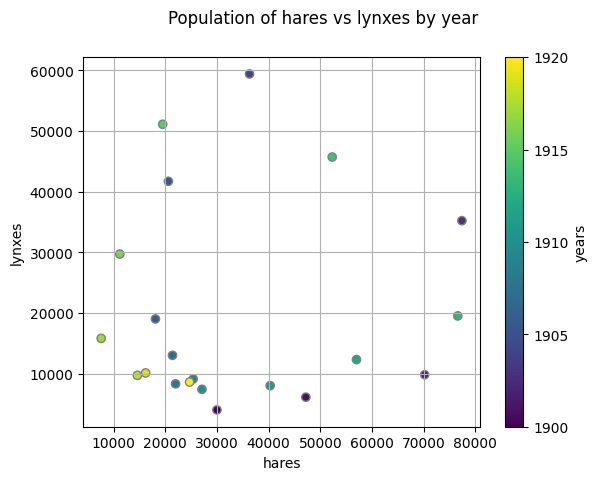

In [73]:
plt.scatter(hares, lynxes, c=years, cmap='viridis', edgecolor='gray') # точечный график, c=years == цвет точки зависит от года
plt.xlabel('hares')
plt.ylabel('lynxes')
plt.suptitle('Population of hares vs lynxes by year')
plt.colorbar(ticks = np.arange(1900,1921,5), label = 'years')
plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [70]:
mask = years != 1920 # булев массив

estimated = np.mean(hares[mask])
true_value = hares[20]
ratio = np.abs(true_value - estimated) / true_value

print('Ratio of the error to true value is ', ratio)

Ratio of the error to true value is  0.39878542510121456
